<a href="https://colab.research.google.com/github/seanyghughes/MIS-Project/blob/master/CryptocurrencyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Machine Learning techniques to analyse cryptocurrency price history and predict future prices**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
# Create a currency class to initialise currency objects
class Currency:
    def __init__(self, currency):
        self.currency = currency
        
    # get bitcoin data
    def btc_data(self):
        global df, x, y
        df = pd.read_csv('coin_Bitcoin.csv')
        x = df[['Open', 'High', 'Low']]
        y = df['Close']
        return df
    
    # get ethereum data
    def ether_data(self):
        global df, x, y
        df = pd.read_csv('coin_Ethereum.csv')
        x = df[['Open', 'High', 'Low']]
        y = df['Close']
        return df
    
    # get binance coin data
    def bnb_data(self):
        global df, x, y
        df = pd.read_csv('coin_BinanceCoin.csv')
        x = df[['Open', 'High', 'Low']]
        y = df['Close']
        return df
    
    # get dogecoin data
    def doge_data(self):
        global df, x, y
        df = pd.read_csv('coin_Dogecoin.csv')
        x = df[['Open', 'High', 'Low']]
        y = df['Close']
        return df
    
    # get ripple data
    def xrp_data(self):
        global df, x, y
        df = pd.read_csv('coin_XRP.csv')
        x = df[['Open', 'High', 'Low']]
        y = df['Close']
        return df

    # Statistical Description of the Data Set
    def data_description(self):
        description = df.describe()
        plt.plot(df['Close'])
        plt.plot(df['Open'])
        plt.title('Closing Price History')
        plt.xlabel('Days')
        plt.ylabel('Price')
        return description

    # Add prediction column to the dataframe
    def pluscolumn(self):
       global predict_days
       predict_days = 10
       df["dayspredict"]=df["Close"].shift(-predict_days)
       return df
    # Arrange variables into array format
    def variable(self):
       global x,y
       x=np.array(df["Close"])
       x=x[:-predict_days]
       y=np.array(df["dayspredict"])
       y=y[:-predict_days]
       return (len(x),len(y))

    # Split dataframe into 80% training and 20% testing
    def split_data(self, x, y):
        global train_x, test_x, train_y, test_y
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = False)
        train_x=np.reshape(train_x,(train_x.shape[0],1))
        test_x=np.reshape(test_x,(test_x.shape[0],1))
        train_y=np.reshape(train_y,(train_y.shape[0],1))
        test_y=np.reshape(test_y,(test_y.shape[0],1))

    # Linear Regression model training and scoring (accuracy)
    def lin_reg(self):
        global lr_model
        lr_model = linear_model.LinearRegression()
        lr_model.fit(train_x, train_y) # training the model
        return (f'Linear Regression Model Accuracy: {lr_model.score(test_x, test_y)}\n Coefficients: {lr_model.coef_} \n Intercept: {lr_model.intercept_}')
    
    # Support Vector Regression model training and scoring (accuracy)
    def svm(self):
        global svr_model
        svr_model = svm.SVR(kernel='rbf', C=1e3, gamma = 0.1)
        svr_model.fit(train_x, train_y) # training the model
        return (f'SVM Model Accuracy: {svr_model.score(test_x, test_y)}')
        
    # Linear Regression Prediction
    def lr_predict(self):
        prediction = lr_model.predict(test_x)
        return (f'Linear Regression Prediction: {prediction[-1]}')
    
    # Support Vector Regression Prediction
    def svr_predict(self):
        prediction = svr_model.predict(test_x) 
        return (f'Support Vector Regression Prediction: {prediction[-1]}')

    # Display of 10 day prediction model
    def dayspredict_visual(self):
        x_predict = np.array(df['Close'])[-predict_days:]
        x_predict = np.reshape(x_predict,(x_predict.shape[0],1))
        lr_predict = lr_model.predict(x_predict)
        svm_predict = svr_model.predict(x_predict)
        plt.plot(lr_predict,label = 'Linear regression model', color= 'red')
        plt.plot(svm_predict,label = 'Support vector machine model', color= 'b')
        plt.title('10 day Price Prediction')
        plt.xlabel('days')
        plt.ylabel('price')
        plt.axhline(lr_predict.mean(), color='k', linestyle='dashed', linewidth=1, label = 'LR Mean')
        plt.axhline(svm_predict.mean(), color='k', linestyle='dashed', linewidth=1, Label = 'SVM Mean')
        plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

    # Previous 30 days price history
    def price_prev_30days(self):
        prev_30days = df['Close'].tail(30)
        date = df['Date'].tail(30)
        fig, ax = plt.subplots(1,1)
        ax.plot(date, prev_30days)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(len(date)/3))
        ax.set_xlabel('Date')
        ax.set_ylabel('USD ($)')
        ax.set_title('30-Day Price History')

    # Previous 6 months price history
    def price_prev_6months(self):
        prev_6months = df['Close'].tail(182)
        date = df['Date'].tail(182)
        fig, ax = plt.subplots(1,1)
        ax.plot(date, prev_6months)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(len(date)/3))
        ax.set_xlabel('Date')
        ax.set_ylabel('USD ($)')
        ax.set_title('6-Month Price History')

    # Previous year price history
    def price_prev_year(self):
        prev_year = df['Close'].tail(365)
        date = df['Date'].tail(365)
        fig, ax = plt.subplots(1,1)
        ax.plot(date, prev_year)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(len(date)/3))
        ax.set_xlabel('Date')
        ax.set_ylabel('USD ($)')
        ax.set_title('1-Year Price History')
        

        


# **Market Capitalisation of Top 5 Cryptocurrencies**

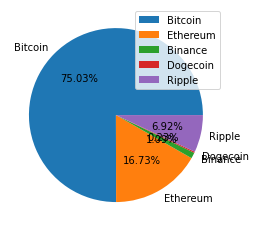

In [ ]:
Bitcoin = pd.read_csv('coin_Bitcoin.csv')['Marketcap'].sum()
Ethereum = pd.read_csv('coin_Ethereum.csv')['Marketcap'].sum()
Binance = pd.read_csv('coin_BinanceCoin.csv')['Marketcap'].sum()
Doge = pd.read_csv('coin_Dogecoin.csv')['Marketcap'].sum()
Xrp = pd.read_csv('coin_XRP.csv')['Marketcap'].sum()


labels = ['Bitcoin', 'Ethereum', 'Binance', 'Dogecoin', 'Ripple']
coins = [Bitcoin, Ethereum, Binance, Doge, Xrp]

plt.pie(coins, labels = labels, autopct = '%1.2f%%')
plt.legend()
plt.show()

# **Bitcoin Analysis**



In [ ]:
bitcoin = Currency('Bitcoin')
bitcoin.btc_data()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


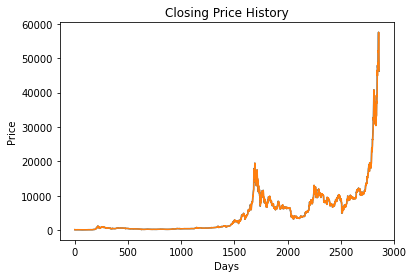

In [ ]:
bitcoin.data_description()

In [ ]:
bitcoin.pluscolumn()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayspredict
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,112.669998
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,117.199997
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,115.242996
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,115.000000
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,117.980003
...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11,NaN
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11,NaN
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11,NaN
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,NaN


In [ ]:
bitcoin.variable()

(2852, 2852)

In [ ]:
bitcoin.split_data(x, y)
print(bitcoin.lin_reg())
print(bitcoin.lr_predict())


Linear Regression Model Accuracy: 0.9211124104586779
 Coefficients: [[0.98487546]] 
 Intercept: [85.78230375]
Linear Regression Prediction: [51446.05985901]


In [ ]:
print(bitcoin.svm())
print(bitcoin.svr_predict())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy: -0.965186831158013
Support Vector Regression Prediction: 3537.844402873994


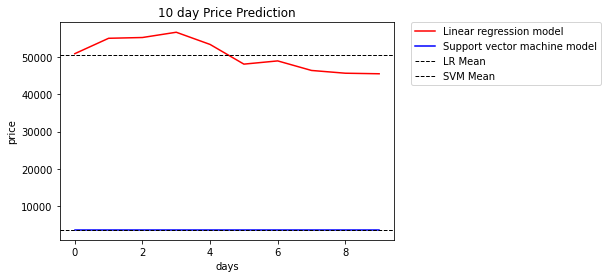

In [ ]:
bitcoin.dayspredict_visual()

None
None
None


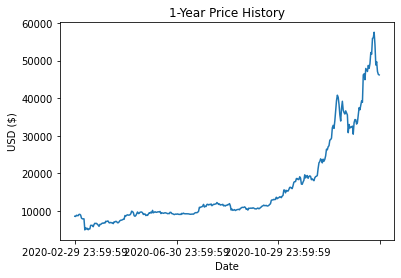

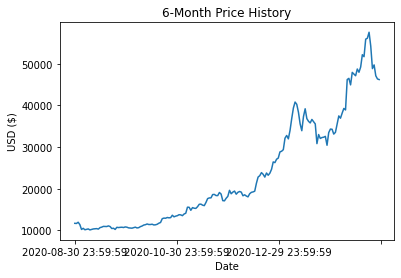

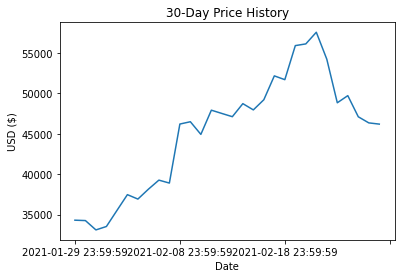

In [ ]:
print(bitcoin.price_prev_year())
print(bitcoin.price_prev_6months())
print(bitcoin.price_prev_30days())


In [ ]:
print(bitcoin.lr_predict())
print(bitcoin.svr_predict())

Linear Regression Prediction: [9494.16007723]
Support Vector Regression Prediction: 3537.844402873994


# **Ethereum** **Analysis** 

In [ ]:
ethereum = Currency('Ethereum')
ethereum.ether_data()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2026,2027,Ethereum,ETH,2021-02-23 23:59:59,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,1.802510e+11
2027,2028,Ethereum,ETH,2021-02-24 23:59:59,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,1.867440e+11
2028,2029,Ethereum,ETH,2021-02-25 23:59:59,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,1.694427e+11
2029,2030,Ethereum,ETH,2021-02-26 23:59:59,1559.028891,1407.979253,1478.653270,1446.033650,3.143600e+10,1.660555e+11


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2.031000e+03,2.031000e+03
mean,1016.000000,267.068034,246.986450,257.490557,258.142275,5.429599e+09,2.698656e+10
std,586.443518,322.096221,292.253460,308.347903,309.321155,8.100359e+09,3.347336e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,508.500000,13.221850,12.515050,12.858200,12.866100,2.848855e+07,1.086243e+09
50%,1016.000000,189.088865,180.317159,184.943356,185.028722,1.844270e+09,1.972963e+10
75%,1523.500000,342.238919,317.625992,332.716492,333.370499,7.944177e+09,3.280357e+10
max,2031.000000,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.249103e+11


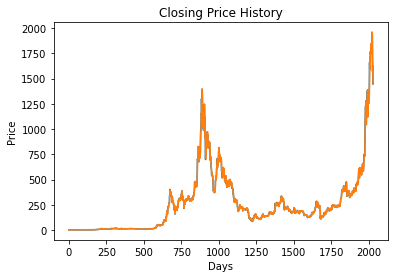

In [ ]:
ethereum.data_description()

In [ ]:
ethereum.pluscolumn()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayspredict
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,1.08705
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,1.25886
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,1.46492
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,1.39529
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,1.37923
...,...,...,...,...,...,...,...,...,...,...,...
2026,2027,Ethereum,ETH,2021-02-23 23:59:59,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,1.802510e+11,NaN
2027,2028,Ethereum,ETH,2021-02-24 23:59:59,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,1.867440e+11,NaN
2028,2029,Ethereum,ETH,2021-02-25 23:59:59,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,1.694427e+11,NaN
2029,2030,Ethereum,ETH,2021-02-26 23:59:59,1559.028891,1407.979253,1478.653270,1446.033650,3.143600e+10,1.660555e+11,NaN


In [ ]:
ethereum.variable()

(2021, 2021)

In [ ]:
ethereum.split_data(x, y)
print(ethereum.lin_reg())
print(ethereum.lr_predict())

Linear Regression Model Accuracy: 0.9204824761340258
 Coefficients: [[0.95906021]] 
 Intercept: [9.32169374]
Linear Regression Prediction: [147.3916283]


In [ ]:
print(ethereum.svm())
print(ethereum.svr_predict())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy: 0.3111900272032957
Support Vector Regression Prediction: 132.03497474882545


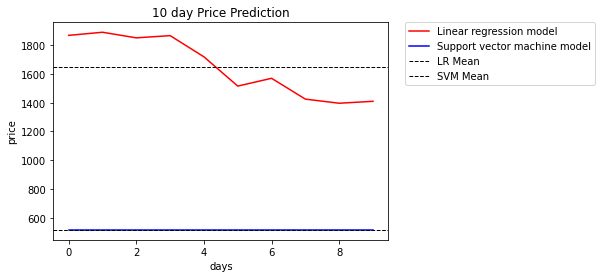

In [ ]:
ethereum.dayspredict_visual()

None
None
None


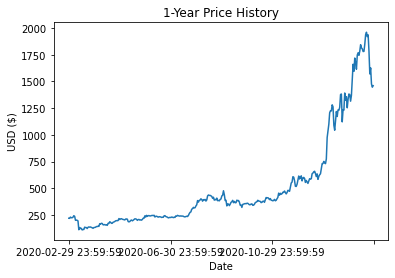

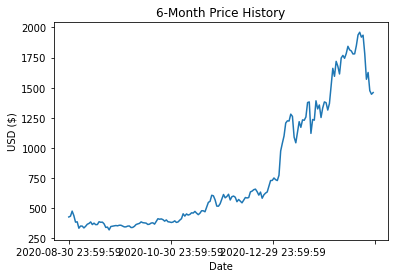

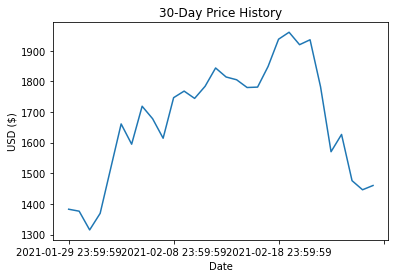

In [ ]:
print(ethereum.price_prev_year())
print(ethereum.price_prev_6months())
print(ethereum.price_prev_30days())

# **Binance Analysis**

In [ ]:
binance = Currency('Binance Coin')
binance.bnb_data()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1308,1309,Binance Coin,BNB,2021-02-23 23:59:59,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10
1309,1310,Binance Coin,BNB,2021-02-24 23:59:59,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10
1310,1311,Binance Coin,BNB,2021-02-25 23:59:59,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10
1311,1312,Binance Coin,BNB,2021-02-26 23:59:59,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10


,SNo,High,Low,Open,Close,Volume,Marketcap
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03,1.313000e+03
mean,657.000000,19.817551,18.049404,18.904878,19.071002,2.877394e+08,2.714483e+09
std,379.174762,27.153366,21.542034,24.328494,24.971663,8.213599e+08,3.886386e+09
min,1.000000,0.101211,0.096109,0.099721,0.099867,9.284190e+03,9.986680e+06
25%,329.000000,10.050000,9.476720,9.708670,9.715040,4.400100e+07,1.075576e+09
50%,657.000000,15.845876,14.949402,15.339182,15.322083,1.736839e+08,2.256062e+09
75%,985.000000,23.245484,21.690390,22.480199,22.514539,3.236722e+08,3.324492e+09
max,1313.000000,342.879593,250.540810,332.918442,332.616033,1.798295e+10,5.140008e+10


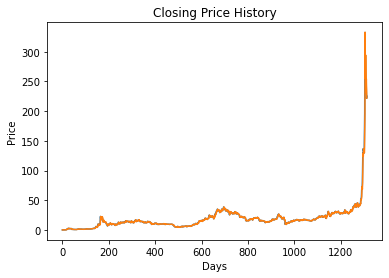

In [ ]:
binance.data_description()

In [ ]:
binance.pluscolumn()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayspredict
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,0.128871
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,0.130999
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,0.148848
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,0.224421
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,0.242912
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,Binance Coin,BNB,2021-02-23 23:59:59,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10,NaN
1309,1310,Binance Coin,BNB,2021-02-24 23:59:59,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10,NaN
1310,1311,Binance Coin,BNB,2021-02-25 23:59:59,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10,NaN
1311,1312,Binance Coin,BNB,2021-02-26 23:59:59,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10,NaN


In [ ]:
binance.variable()

(1303, 1303)

In [ ]:
binance.split_data(x, y)
print(binance.lin_reg())
print(binance.lr_predict())

Linear Regression Model Accuracy: 0.5735661745958014
 Coefficients: [[0.93479991]] 
 Intercept: [1.05990439]
Linear Regression Prediction: [17.17520417]


In [ ]:
print(binance.svm())
print(binance.svr_predict())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy: -0.1967436808065548
Support Vector Regression Prediction: 17.633732124033525


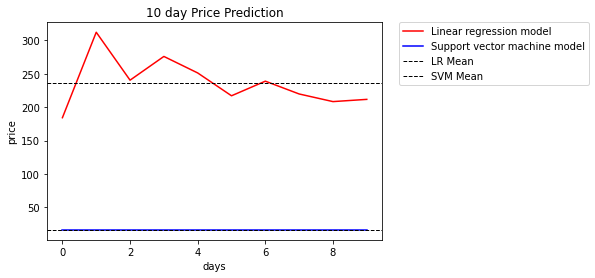

In [ ]:
binance.dayspredict_visual()

None
None
None


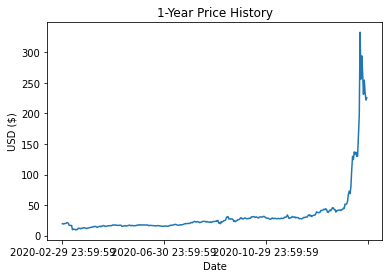

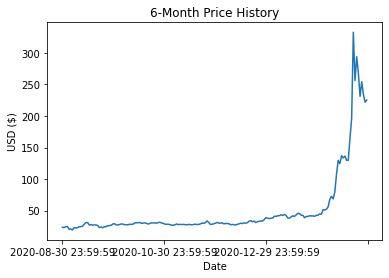

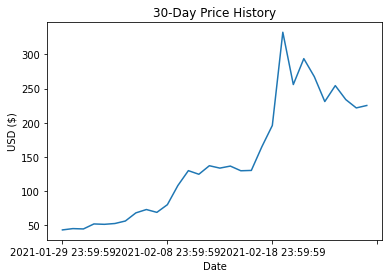

In [ ]:
print(binance.price_prev_year())
print(binance.price_prev_6months())
print(binance.price_prev_30days())

# **Dogecoin Analysis**

In [ ]:
doge = Currency('Dogecoin')
doge.doge_data()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...
2626,2627,Dogecoin,DOGE,2021-02-23 23:59:59,0.053768,0.042410,0.053698,0.047392,2.394345e+09,6.089686e+09
2627,2628,Dogecoin,DOGE,2021-02-24 23:59:59,0.059873,0.046216,0.047414,0.056555,4.148512e+09,7.267918e+09
2628,2629,Dogecoin,DOGE,2021-02-25 23:59:59,0.057808,0.049869,0.056615,0.050167,2.356982e+09,6.447665e+09
2629,2630,Dogecoin,DOGE,2021-02-26 23:59:59,0.052472,0.048708,0.050138,0.050480,1.694323e+09,6.488523e+09


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2.631000e+03,2.631000e+03
mean,1316.000000,0.002566,0.002243,0.002394,0.002410,1.063104e+08,2.874625e+08
std,759.648603,0.006796,0.005422,0.006064,0.006118,8.458638e+08,7.822927e+08
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,658.500000,0.000229,0.000220,0.000224,0.000224,2.338655e+05,2.314820e+07
50%,1316.000000,0.001645,0.001387,0.001523,0.001523,4.485170e+06,1.552847e+08
75%,1973.500000,0.002810,0.002625,0.002710,0.002714,3.863918e+07,3.298987e+08
max,2631.000000,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10


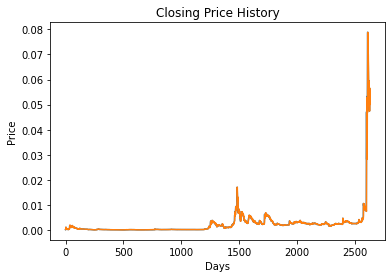

In [ ]:
doge.data_description()

In [ ]:
doge.pluscolumn()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayspredict
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06,0.000602
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06,0.000522
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06,0.000459
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07,0.000454
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06,0.000416
...,...,...,...,...,...,...,...,...,...,...,...
2626,2627,Dogecoin,DOGE,2021-02-23 23:59:59,0.053768,0.042410,0.053698,0.047392,2.394345e+09,6.089686e+09,NaN
2627,2628,Dogecoin,DOGE,2021-02-24 23:59:59,0.059873,0.046216,0.047414,0.056555,4.148512e+09,7.267918e+09,NaN
2628,2629,Dogecoin,DOGE,2021-02-25 23:59:59,0.057808,0.049869,0.056615,0.050167,2.356982e+09,6.447665e+09,NaN
2629,2630,Dogecoin,DOGE,2021-02-26 23:59:59,0.052472,0.048708,0.050138,0.050480,1.694323e+09,6.488523e+09,NaN


In [ ]:
doge.variable()

(2621, 2621)

In [ ]:
doge.split_data(x, y)
print(doge.lin_reg())
print(doge.lr_predict())

Linear Regression Model Accuracy: 0.6961584947729441
 Coefficients: [[0.91315162]] 
 Intercept: [0.00014041]
Linear Regression Prediction: [0.00235482]


In [ ]:
print(doge.svm())
print(doge.svr_predict())

SVM Model Accuracy: -0.04221303446445712
Support Vector Regression Prediction: 0.008587482523580547


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


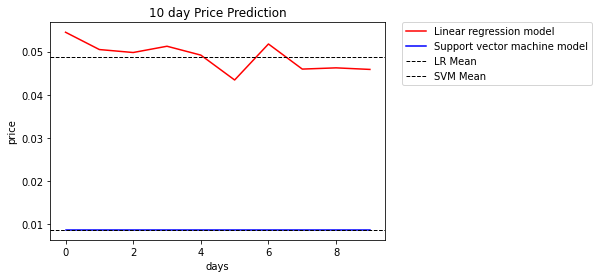

In [ ]:
doge.dayspredict_visual()

None
None
None


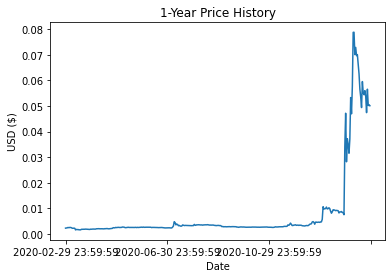

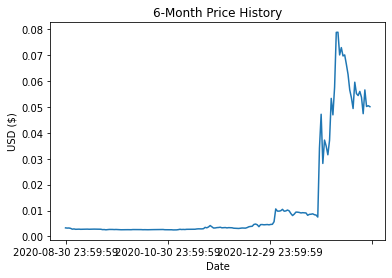

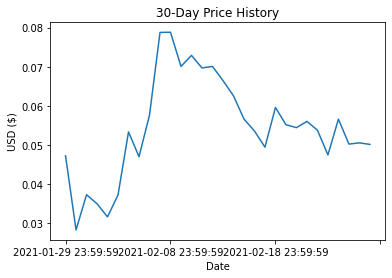

In [ ]:
print(doge.price_prev_year())
print(doge.price_prev_6months())
print(doge.price_prev_30days())

# **Ripple Analysis**

In [ ]:
xrp = Currency('XRP')
xrp.xrp_data()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...,...
2759,2760,XRP,XRP,2021-02-23 23:59:59,0.570989,0.379302,0.570989,0.473563,1.435902e+10,2.150165e+10
2760,2761,XRP,XRP,2021-02-24 23:59:59,0.499370,0.454759,0.474201,0.471832,8.015469e+09,2.142305e+10
2761,2762,XRP,XRP,2021-02-25 23:59:59,0.482517,0.429103,0.471776,0.434524,5.952354e+09,1.972912e+10
2762,2763,XRP,XRP,2021-02-26 23:59:59,0.450440,0.415559,0.434941,0.427900,6.476254e+09,1.942839e+10


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2.764000e+03,2.764000e+03
mean,1382.500000,0.211615,0.192096,0.201967,0.202130,9.432946e+08,8.208210e+09
std,798.042397,0.321864,0.275072,0.297988,0.298001,2.436647e+09,1.182689e+10
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,2.196991e+07
25%,691.750000,0.007289,0.006791,0.007017,0.007022,4.467485e+05,2.206272e+08
50%,1382.500000,0.161938,0.144407,0.155642,0.157144,5.126550e+07,6.229240e+09
75%,2073.250000,0.306037,0.287530,0.297542,0.297521,1.067129e+09,1.267811e+10
max,2764.000000,3.841940,3.117340,3.363570,3.377810,3.497423e+10,1.308535e+11


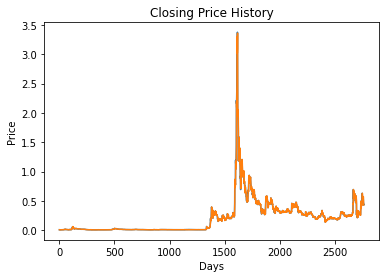

In [ ]:
xrp.data_description()

In [ ]:
xrp.pluscolumn()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayspredict
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07,0.003092
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07,0.003134
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07,0.005671
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07,0.005617
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07,0.005260
...,...,...,...,...,...,...,...,...,...,...,...
2759,2760,XRP,XRP,2021-02-23 23:59:59,0.570989,0.379302,0.570989,0.473563,1.435902e+10,2.150165e+10,NaN
2760,2761,XRP,XRP,2021-02-24 23:59:59,0.499370,0.454759,0.474201,0.471832,8.015469e+09,2.142305e+10,NaN
2761,2762,XRP,XRP,2021-02-25 23:59:59,0.482517,0.429103,0.471776,0.434524,5.952354e+09,1.972912e+10,NaN
2762,2763,XRP,XRP,2021-02-26 23:59:59,0.450440,0.415559,0.434941,0.427900,6.476254e+09,1.942839e+10,NaN


In [ ]:
xrp.variable()

(2754, 2754)

In [ ]:
xrp.split_data(x, y)
print(xrp.lin_reg())
print(xrp.lr_predict())

Linear Regression Model Accuracy: 0.526966929447999
 Coefficients: [[0.8792354]] 
 Intercept: [0.0235317]
Linear Regression Prediction: [0.25716274]


In [ ]:
print(xrp.svm())
print(xrp.svr_predict())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Accuracy: 0.4223640956054225
Support Vector Regression Prediction: 0.30659403300567445


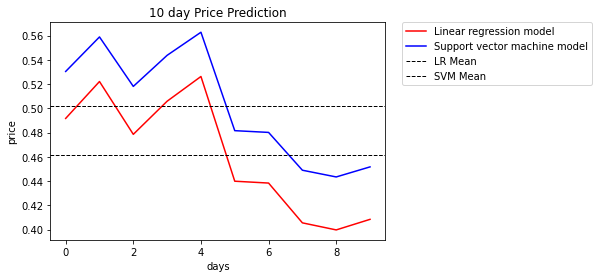

In [ ]:
xrp.dayspredict_visual()

None
None
None


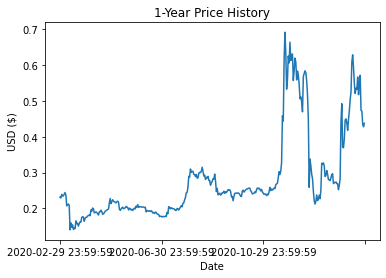

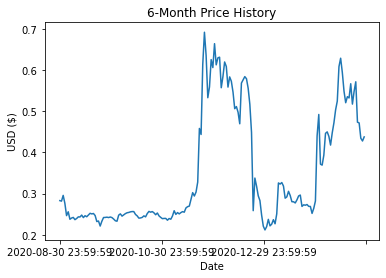

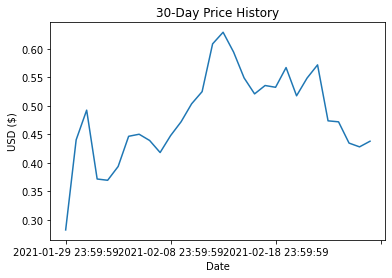

In [ ]:
print(xrp.price_prev_year())
print(xrp.price_prev_6months())
print(xrp.price_prev_30days())

## **Conclusion**